In [1]:
# TensorFlow is an open source machine learning library
# Note: The following line is temporary to use v2
!pip install tensorflow==2.0.0-beta0
import tensorflow as tf
# Numpy is a math library
import numpy as np
# Matplotlib is a graphing library
import matplotlib.pyplot as plt
# math is Python's math library
import math

     |████████████████████████████████| 87.9MB 25.5MB/s eta 0:00:01     |██████████▌                     | 28.7MB 25.3MB/s eta 0:00:03
     |████████████████████████████████| 1.3MB 33.9MB/s eta 0:00:01
     |████████████████████████████████| 2.3MB 23.9MB/s eta 0:00:01
     |████████████████████████████████| 501kB 13.6MB/s eta 0:00:01
     |████████████████████████████████| 112kB 5.9MB/s eta 0:00:01
     |████████████████████████████████| 61kB 12.0MB/s eta 0:00:01
     |████████████████████████████████| 51kB 10.8MB/s eta 0:00:01
     |████████████████████████████████| 51kB 12.4MB/s eta 0:00:01
     |████████████████████████████████| 3.1MB 27.5MB/s eta 0:00:01
     |████████████████████████████████| 3.0MB 37.9MB/s eta 0:00:01
     |████████████████████████████████| 92kB 13.4MB/s eta 0:00:01
     |████████████████████████████████| 327kB 27.7MB/s eta 0:00:01
ERROR: tb-nightly 1.14.0a20190603 has requirement setuptools>=41.0.0, but you'll have setuptools 40.6.2 which is incompatible.
    Ru

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/

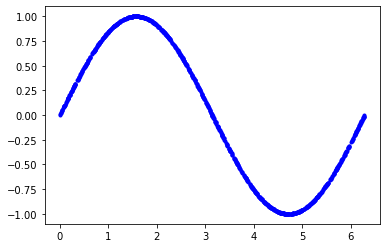

In [2]:
# We'll generate this many sample datapoints
SAMPLES = 1000

# Set a "seed" value, so we get the same random numbers each time we run this
# notebook
np.random.seed(1337)

# Generate a uniformly distributed set of random numbers in the range from
# 0 to 2π, which covers a complete sine wave oscillation
x_values = np.random.uniform(low=0, high=2*math.pi, size=SAMPLES)

# Shuffle the values to guarantee they're not in order
np.random.shuffle(x_values)

# Calculate the corresponding sine values
y_values = np.sin(x_values)

# Plot our data. The 'b.' argument tells the library to print blue dots.
plt.plot(x_values, y_values, 'b.')
plt.show()

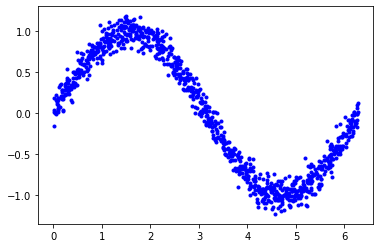

In [3]:
# Add a small random number to each y value
y_values += 0.1 * np.random.randn(*y_values.shape)

# Plot our data
plt.plot(x_values, y_values, 'b.')
plt.show()

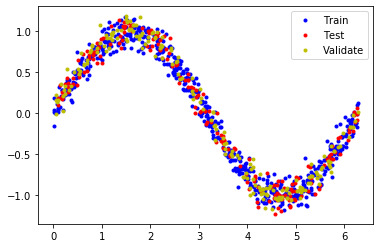

In [4]:
# We'll use 60% of our data for training and 20% for testing. The remaining 20%
# will be used for validation. Calculate the indices of each section.
TRAIN_SPLIT =  int(0.6 * SAMPLES)
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)

# Use np.split to chop our data into three parts.
# The second argument to np.split is an array of indices where the data will be
# split. We provide two indices, so the data will be divided into three chunks.
x_train, x_test, x_validate = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_test, y_validate = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])

# Double check that our splits add up correctly
assert (x_train.size + x_validate.size + x_test.size) ==  SAMPLES

# Plot the data in each partition in different colors:
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.plot(x_validate, y_validate, 'y.', label="Validate")
plt.legend()
plt.show()

In [5]:
# We'll use Keras to create a simple model architecture
from tensorflow.keras import layers
model_1 = tf.keras.Sequential()

# First layer takes a scalar input and feeds it through 16 "neurons". The
# neurons decide whether to activate based on the 'relu' activation function.
model_1.add(layers.Dense(16, activation='relu', input_shape=(1,)))

# Final layer is a single neuron, since we want to output a single value
model_1.add(layers.Dense(1))

# Compile the model using a standard optimizer and loss function for regression
model_1.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [6]:
# Train the model on our training data while validating on our validation set
history_1 = model_1.fit(x_train, y_train, epochs=1000, batch_size=16,
                    validation_data=(x_validate, y_validate))

Train on 600 samples, validate on 200 samples
Epoch 1/1000
600/600 [==============================] - 0s 511us/sample - loss: 0.3852 - mae: 0.5380 - val_loss: 0.4197 - val_mae: 0.5714
Epoch 2/1000
600/600 [==============================] - 0s 82us/sample - loss: 0.3324 - mae: 0.5012 - val_loss: 0.3609 - val_mae: 0.5182
Epoch 3/1000
600/600 [==============================] - 0s 77us/sample - loss: 0.2946 - mae: 0.4713 - val_loss: 0.3203 - val_mae: 0.4910
Epoch 4/1000
600/600 [==============================] - 0s 76us/sample - loss: 0.2631 - mae: 0.4479 - val_loss: 0.2893 - val_mae: 0.4751
Epoch 5/1000
600/600 [==============================] - 0s 73us/sample - loss: 0.2385 - mae: 0.4275 - val_loss: 0.2580 - val_mae: 0.4470
Epoch 6/1000
600/600 [==============================] - 0s 74us/sample - loss: 0.2178 - mae: 0.4101 - val_loss: 0.2338 - val_mae: 0.4241
Epoch 7/1000
600/600 [==============================] - 0s 75us/sample - loss: 0.2032 - mae: 0.3975 - val_loss: 0.2158 - val_mae: 0

600/600 [==============================] - 0s 82us/sample - loss: 0.1578 - mae: 0.3229 - val_loss: 0.1625 - val_mae: 0.3338
Epoch 61/1000
600/600 [==============================] - 0s 73us/sample - loss: 0.1576 - mae: 0.3210 - val_loss: 0.1669 - val_mae: 0.3374
Epoch 62/1000
600/600 [==============================] - 0s 71us/sample - loss: 0.1584 - mae: 0.3227 - val_loss: 0.1605 - val_mae: 0.3324
Epoch 63/1000
600/600 [==============================] - 0s 69us/sample - loss: 0.1587 - mae: 0.3237 - val_loss: 0.1609 - val_mae: 0.3324
Epoch 64/1000
600/600 [==============================] - 0s 67us/sample - loss: 0.1583 - mae: 0.3239 - val_loss: 0.1579 - val_mae: 0.3299
Epoch 65/1000
600/600 [==============================] - 0s 66us/sample - loss: 0.1579 - mae: 0.3218 - val_loss: 0.1545 - val_mae: 0.3263
Epoch 66/1000
600/600 [==============================] - 0s 78us/sample - loss: 0.1578 - mae: 0.3212 - val_loss: 0.1693 - val_mae: 0.3389
Epoch 67/1000
600/600 [=========================

600/600 [==============================] - 0s 74us/sample - loss: 0.1541 - mae: 0.3125 - val_loss: 0.1659 - val_mae: 0.3327
Epoch 120/1000
600/600 [==============================] - 0s 73us/sample - loss: 0.1577 - mae: 0.3182 - val_loss: 0.1536 - val_mae: 0.3224
Epoch 121/1000
600/600 [==============================] - 0s 68us/sample - loss: 0.1574 - mae: 0.3181 - val_loss: 0.1610 - val_mae: 0.3288
Epoch 122/1000
600/600 [==============================] - 0s 71us/sample - loss: 0.1568 - mae: 0.3172 - val_loss: 0.1530 - val_mae: 0.3218
Epoch 123/1000
600/600 [==============================] - 0s 68us/sample - loss: 0.1562 - mae: 0.3164 - val_loss: 0.1583 - val_mae: 0.3266
Epoch 124/1000
600/600 [==============================] - 0s 78us/sample - loss: 0.1565 - mae: 0.3172 - val_loss: 0.1521 - val_mae: 0.3203
Epoch 125/1000
600/600 [==============================] - 0s 72us/sample - loss: 0.1562 - mae: 0.3175 - val_loss: 0.1525 - val_mae: 0.3212
Epoch 126/1000
600/600 [==================

600/600 [==============================] - 0s 69us/sample - loss: 0.1563 - mae: 0.3154 - val_loss: 0.1518 - val_mae: 0.3187
Epoch 179/1000
600/600 [==============================] - 0s 69us/sample - loss: 0.1571 - mae: 0.3161 - val_loss: 0.1522 - val_mae: 0.3191
Epoch 180/1000
600/600 [==============================] - 0s 66us/sample - loss: 0.1564 - mae: 0.3165 - val_loss: 0.1524 - val_mae: 0.3190
Epoch 181/1000
600/600 [==============================] - 0s 69us/sample - loss: 0.1567 - mae: 0.3142 - val_loss: 0.1530 - val_mae: 0.3197
Epoch 182/1000
600/600 [==============================] - 0s 64us/sample - loss: 0.1554 - mae: 0.3154 - val_loss: 0.1517 - val_mae: 0.3176
Epoch 183/1000
600/600 [==============================] - 0s 75us/sample - loss: 0.1560 - mae: 0.3153 - val_loss: 0.1523 - val_mae: 0.3190
Epoch 184/1000
600/600 [==============================] - 0s 69us/sample - loss: 0.1567 - mae: 0.3154 - val_loss: 0.1518 - val_mae: 0.3182
Epoch 185/1000
600/600 [==================

600/600 [==============================] - 0s 90us/sample - loss: 0.1553 - mae: 0.3121 - val_loss: 0.1506 - val_mae: 0.3155
Epoch 238/1000
600/600 [==============================] - 0s 77us/sample - loss: 0.1550 - mae: 0.3129 - val_loss: 0.1505 - val_mae: 0.3150
Epoch 239/1000
600/600 [==============================] - 0s 91us/sample - loss: 0.1560 - mae: 0.3127 - val_loss: 0.1510 - val_mae: 0.3160
Epoch 240/1000
600/600 [==============================] - 0s 92us/sample - loss: 0.1562 - mae: 0.3129 - val_loss: 0.1518 - val_mae: 0.3168
Epoch 241/1000
600/600 [==============================] - 0s 98us/sample - loss: 0.1554 - mae: 0.3117 - val_loss: 0.1512 - val_mae: 0.3159
Epoch 242/1000
600/600 [==============================] - 0s 88us/sample - loss: 0.1558 - mae: 0.3145 - val_loss: 0.1550 - val_mae: 0.3194
Epoch 243/1000
600/600 [==============================] - 0s 87us/sample - loss: 0.1557 - mae: 0.3126 - val_loss: 0.1526 - val_mae: 0.3172
Epoch 244/1000
600/600 [==================

600/600 [==============================] - 0s 63us/sample - loss: 0.1551 - mae: 0.3119 - val_loss: 0.1510 - val_mae: 0.3143
Epoch 297/1000
600/600 [==============================] - 0s 70us/sample - loss: 0.1546 - mae: 0.3108 - val_loss: 0.1496 - val_mae: 0.3121
Epoch 298/1000
600/600 [==============================] - 0s 70us/sample - loss: 0.1544 - mae: 0.3110 - val_loss: 0.1510 - val_mae: 0.3141
Epoch 299/1000
600/600 [==============================] - 0s 69us/sample - loss: 0.1550 - mae: 0.3097 - val_loss: 0.1520 - val_mae: 0.3152
Epoch 300/1000
600/600 [==============================] - 0s 67us/sample - loss: 0.1531 - mae: 0.3078 - val_loss: 0.1572 - val_mae: 0.3195
Epoch 301/1000
600/600 [==============================] - 0s 67us/sample - loss: 0.1548 - mae: 0.3121 - val_loss: 0.1512 - val_mae: 0.3129
Epoch 302/1000
600/600 [==============================] - 0s 78us/sample - loss: 0.1551 - mae: 0.3101 - val_loss: 0.1532 - val_mae: 0.3165
Epoch 303/1000
600/600 [==================

600/600 [==============================] - 0s 73us/sample - loss: 0.1542 - mae: 0.3100 - val_loss: 0.1492 - val_mae: 0.3109
Epoch 356/1000
600/600 [==============================] - 0s 76us/sample - loss: 0.1545 - mae: 0.3108 - val_loss: 0.1515 - val_mae: 0.3136
Epoch 357/1000
600/600 [==============================] - 0s 70us/sample - loss: 0.1552 - mae: 0.3097 - val_loss: 0.1495 - val_mae: 0.3117
Epoch 358/1000
600/600 [==============================] - 0s 66us/sample - loss: 0.1547 - mae: 0.3097 - val_loss: 0.1610 - val_mae: 0.3220
Epoch 359/1000
600/600 [==============================] - 0s 71us/sample - loss: 0.1550 - mae: 0.3092 - val_loss: 0.1495 - val_mae: 0.3119
Epoch 360/1000
600/600 [==============================] - 0s 74us/sample - loss: 0.1543 - mae: 0.3103 - val_loss: 0.1494 - val_mae: 0.3116
Epoch 361/1000
600/600 [==============================] - 0s 75us/sample - loss: 0.1548 - mae: 0.3098 - val_loss: 0.1558 - val_mae: 0.3175
Epoch 362/1000
600/600 [==================

600/600 [==============================] - 0s 70us/sample - loss: 0.1535 - mae: 0.3086 - val_loss: 0.1654 - val_mae: 0.3251
Epoch 415/1000
600/600 [==============================] - 0s 73us/sample - loss: 0.1544 - mae: 0.3085 - val_loss: 0.1518 - val_mae: 0.3147
Epoch 416/1000
600/600 [==============================] - 0s 65us/sample - loss: 0.1550 - mae: 0.3111 - val_loss: 0.1511 - val_mae: 0.3137
Epoch 417/1000
600/600 [==============================] - 0s 73us/sample - loss: 0.1560 - mae: 0.3106 - val_loss: 0.1508 - val_mae: 0.3133
Epoch 418/1000
600/600 [==============================] - 0s 69us/sample - loss: 0.1543 - mae: 0.3107 - val_loss: 0.1540 - val_mae: 0.3160
Epoch 419/1000
600/600 [==============================] - 0s 71us/sample - loss: 0.1527 - mae: 0.3071 - val_loss: 0.1711 - val_mae: 0.3288
Epoch 420/1000
600/600 [==============================] - 0s 69us/sample - loss: 0.1556 - mae: 0.3097 - val_loss: 0.1561 - val_mae: 0.3175
Epoch 421/1000
600/600 [==================

600/600 [==============================] - 0s 78us/sample - loss: 0.1533 - mae: 0.3095 - val_loss: 0.1511 - val_mae: 0.3105
Epoch 474/1000
600/600 [==============================] - 0s 78us/sample - loss: 0.1553 - mae: 0.3099 - val_loss: 0.1490 - val_mae: 0.3099
Epoch 475/1000
600/600 [==============================] - 0s 117us/sample - loss: 0.1545 - mae: 0.3090 - val_loss: 0.1551 - val_mae: 0.3159
Epoch 476/1000
600/600 [==============================] - 0s 93us/sample - loss: 0.1550 - mae: 0.3103 - val_loss: 0.1636 - val_mae: 0.3228
Epoch 477/1000
600/600 [==============================] - 0s 69us/sample - loss: 0.1544 - mae: 0.3098 - val_loss: 0.1502 - val_mae: 0.3109
Epoch 478/1000
600/600 [==============================] - 0s 90us/sample - loss: 0.1537 - mae: 0.3064 - val_loss: 0.1658 - val_mae: 0.3245
Epoch 479/1000
600/600 [==============================] - 0s 68us/sample - loss: 0.1552 - mae: 0.3105 - val_loss: 0.1558 - val_mae: 0.3170
Epoch 480/1000
600/600 [=================

600/600 [==============================] - 0s 74us/sample - loss: 0.1552 - mae: 0.3091 - val_loss: 0.1569 - val_mae: 0.3176
Epoch 533/1000
600/600 [==============================] - 0s 63us/sample - loss: 0.1548 - mae: 0.3103 - val_loss: 0.1492 - val_mae: 0.3106
Epoch 534/1000
600/600 [==============================] - 0s 70us/sample - loss: 0.1538 - mae: 0.3068 - val_loss: 0.1605 - val_mae: 0.3204
Epoch 535/1000
600/600 [==============================] - 0s 72us/sample - loss: 0.1554 - mae: 0.3102 - val_loss: 0.1499 - val_mae: 0.3115
Epoch 536/1000
600/600 [==============================] - 0s 78us/sample - loss: 0.1557 - mae: 0.3098 - val_loss: 0.1509 - val_mae: 0.3126
Epoch 537/1000
600/600 [==============================] - 0s 69us/sample - loss: 0.1536 - mae: 0.3088 - val_loss: 0.1497 - val_mae: 0.3114
Epoch 538/1000
600/600 [==============================] - 0s 67us/sample - loss: 0.1546 - mae: 0.3091 - val_loss: 0.1499 - val_mae: 0.3108
Epoch 539/1000
600/600 [==================

600/600 [==============================] - 0s 68us/sample - loss: 0.1532 - mae: 0.3074 - val_loss: 0.1495 - val_mae: 0.3108
Epoch 592/1000
600/600 [==============================] - 0s 99us/sample - loss: 0.1552 - mae: 0.3096 - val_loss: 0.1558 - val_mae: 0.3163
Epoch 593/1000
600/600 [==============================] - 0s 102us/sample - loss: 0.1547 - mae: 0.3097 - val_loss: 0.1500 - val_mae: 0.3113
Epoch 594/1000
600/600 [==============================] - 0s 69us/sample - loss: 0.1544 - mae: 0.3087 - val_loss: 0.1523 - val_mae: 0.3133
Epoch 595/1000
600/600 [==============================] - 0s 78us/sample - loss: 0.1566 - mae: 0.3103 - val_loss: 0.1511 - val_mae: 0.3120
Epoch 596/1000
600/600 [==============================] - 0s 69us/sample - loss: 0.1529 - mae: 0.3081 - val_loss: 0.1500 - val_mae: 0.3108
Epoch 597/1000
600/600 [==============================] - 0s 84us/sample - loss: 0.1542 - mae: 0.3091 - val_loss: 0.1504 - val_mae: 0.3112
Epoch 598/1000
600/600 [=================

600/600 [==============================] - 0s 65us/sample - loss: 0.1535 - mae: 0.3063 - val_loss: 0.1498 - val_mae: 0.3107
Epoch 651/1000
600/600 [==============================] - 0s 68us/sample - loss: 0.1552 - mae: 0.3099 - val_loss: 0.1490 - val_mae: 0.3097
Epoch 652/1000
600/600 [==============================] - 0s 70us/sample - loss: 0.1535 - mae: 0.3068 - val_loss: 0.1538 - val_mae: 0.3142
Epoch 653/1000
600/600 [==============================] - 0s 70us/sample - loss: 0.1540 - mae: 0.3100 - val_loss: 0.1492 - val_mae: 0.3101
Epoch 654/1000
600/600 [==============================] - 0s 96us/sample - loss: 0.1546 - mae: 0.3094 - val_loss: 0.1502 - val_mae: 0.3107
Epoch 655/1000
600/600 [==============================] - 0s 68us/sample - loss: 0.1548 - mae: 0.3079 - val_loss: 0.1512 - val_mae: 0.3120
Epoch 656/1000
600/600 [==============================] - 0s 74us/sample - loss: 0.1549 - mae: 0.3086 - val_loss: 0.1489 - val_mae: 0.3091
Epoch 657/1000
600/600 [==================

600/600 [==============================] - 0s 72us/sample - loss: 0.1535 - mae: 0.3081 - val_loss: 0.1500 - val_mae: 0.3110
Epoch 710/1000
600/600 [==============================] - 0s 66us/sample - loss: 0.1512 - mae: 0.3057 - val_loss: 0.1567 - val_mae: 0.3164
Epoch 711/1000
600/600 [==============================] - 0s 70us/sample - loss: 0.1546 - mae: 0.3089 - val_loss: 0.1506 - val_mae: 0.3101
Epoch 712/1000
600/600 [==============================] - 0s 73us/sample - loss: 0.1544 - mae: 0.3078 - val_loss: 0.1496 - val_mae: 0.3105
Epoch 713/1000
600/600 [==============================] - 0s 68us/sample - loss: 0.1525 - mae: 0.3056 - val_loss: 0.1495 - val_mae: 0.3103
Epoch 714/1000
600/600 [==============================] - 0s 70us/sample - loss: 0.1542 - mae: 0.3086 - val_loss: 0.1558 - val_mae: 0.3156
Epoch 715/1000
600/600 [==============================] - 0s 69us/sample - loss: 0.1538 - mae: 0.3067 - val_loss: 0.1496 - val_mae: 0.3103
Epoch 716/1000
600/600 [==================

600/600 [==============================] - 0s 73us/sample - loss: 0.1558 - mae: 0.3080 - val_loss: 0.1510 - val_mae: 0.3115
Epoch 769/1000
600/600 [==============================] - 0s 73us/sample - loss: 0.1542 - mae: 0.3094 - val_loss: 0.1515 - val_mae: 0.3117
Epoch 770/1000
600/600 [==============================] - 0s 71us/sample - loss: 0.1547 - mae: 0.3084 - val_loss: 0.1528 - val_mae: 0.3130
Epoch 771/1000
600/600 [==============================] - 0s 68us/sample - loss: 0.1540 - mae: 0.3079 - val_loss: 0.1538 - val_mae: 0.3136
Epoch 772/1000
600/600 [==============================] - 0s 79us/sample - loss: 0.1521 - mae: 0.3054 - val_loss: 0.1491 - val_mae: 0.3089
Epoch 773/1000
600/600 [==============================] - 0s 78us/sample - loss: 0.1550 - mae: 0.3076 - val_loss: 0.1547 - val_mae: 0.3143
Epoch 774/1000
600/600 [==============================] - 0s 88us/sample - loss: 0.1549 - mae: 0.3079 - val_loss: 0.1541 - val_mae: 0.3141
Epoch 775/1000
600/600 [==================

600/600 [==============================] - 0s 68us/sample - loss: 0.1552 - mae: 0.3075 - val_loss: 0.1516 - val_mae: 0.3116
Epoch 828/1000
600/600 [==============================] - 0s 65us/sample - loss: 0.1547 - mae: 0.3085 - val_loss: 0.1519 - val_mae: 0.3118
Epoch 829/1000
600/600 [==============================] - 0s 70us/sample - loss: 0.1546 - mae: 0.3075 - val_loss: 0.1487 - val_mae: 0.3084
Epoch 830/1000
600/600 [==============================] - 0s 62us/sample - loss: 0.1562 - mae: 0.3084 - val_loss: 0.1520 - val_mae: 0.3118
Epoch 831/1000
600/600 [==============================] - 0s 74us/sample - loss: 0.1542 - mae: 0.3075 - val_loss: 0.1486 - val_mae: 0.3083
Epoch 832/1000
600/600 [==============================] - 0s 66us/sample - loss: 0.1550 - mae: 0.3095 - val_loss: 0.1492 - val_mae: 0.3094
Epoch 833/1000
600/600 [==============================] - 0s 63us/sample - loss: 0.1533 - mae: 0.3051 - val_loss: 0.1493 - val_mae: 0.3091
Epoch 834/1000
600/600 [==================

600/600 [==============================] - 0s 86us/sample - loss: 0.1553 - mae: 0.3078 - val_loss: 0.1495 - val_mae: 0.3097
Epoch 887/1000
600/600 [==============================] - 0s 82us/sample - loss: 0.1527 - mae: 0.3076 - val_loss: 0.1488 - val_mae: 0.3089
Epoch 888/1000
600/600 [==============================] - 0s 68us/sample - loss: 0.1531 - mae: 0.3071 - val_loss: 0.1535 - val_mae: 0.3109
Epoch 889/1000
600/600 [==============================] - 0s 72us/sample - loss: 0.1553 - mae: 0.3084 - val_loss: 0.1491 - val_mae: 0.3090
Epoch 890/1000
600/600 [==============================] - 0s 74us/sample - loss: 0.1537 - mae: 0.3062 - val_loss: 0.1562 - val_mae: 0.3158
Epoch 891/1000
600/600 [==============================] - 0s 70us/sample - loss: 0.1535 - mae: 0.3077 - val_loss: 0.1511 - val_mae: 0.3115
Epoch 892/1000
600/600 [==============================] - 0s 82us/sample - loss: 0.1546 - mae: 0.3075 - val_loss: 0.1535 - val_mae: 0.3133
Epoch 893/1000
600/600 [==================

600/600 [==============================] - 0s 68us/sample - loss: 0.1550 - mae: 0.3072 - val_loss: 0.1493 - val_mae: 0.3091
Epoch 946/1000
600/600 [==============================] - 0s 76us/sample - loss: 0.1530 - mae: 0.3058 - val_loss: 0.1523 - val_mae: 0.3119
Epoch 947/1000
600/600 [==============================] - 0s 66us/sample - loss: 0.1522 - mae: 0.3043 - val_loss: 0.1731 - val_mae: 0.3284
Epoch 948/1000
600/600 [==============================] - 0s 64us/sample - loss: 0.1555 - mae: 0.3092 - val_loss: 0.1492 - val_mae: 0.3094
Epoch 949/1000
600/600 [==============================] - 0s 76us/sample - loss: 0.1540 - mae: 0.3075 - val_loss: 0.1488 - val_mae: 0.3087
Epoch 950/1000
600/600 [==============================] - 0s 67us/sample - loss: 0.1553 - mae: 0.3086 - val_loss: 0.1543 - val_mae: 0.3141
Epoch 951/1000
600/600 [==============================] - 0s 68us/sample - loss: 0.1538 - mae: 0.3083 - val_loss: 0.1489 - val_mae: 0.3089
Epoch 952/1000
600/600 [==================

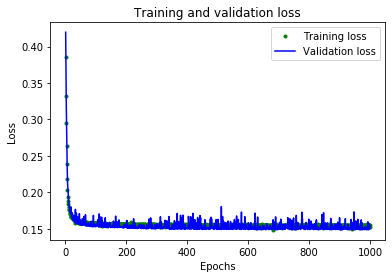

In [7]:
# Draw a graph of the loss, which is the distance between
# the predicted and actual values during training and validation.
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

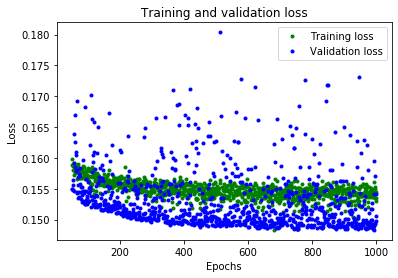

In [8]:
# Exclude the first few epochs so the graph is easier to read
SKIP = 50

plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

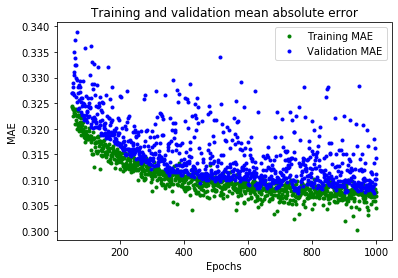

In [9]:
plt.clf()

# Draw a graph of mean absolute error, which is another way of
# measuring the amount of error in the prediction.
mae = history_1.history['mae']
val_mae = history_1.history['val_mae']

plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

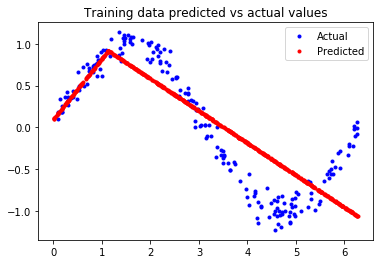

In [10]:
# Use the model to make predictions from our validation data
predictions = model_1.predict(x_train)

# Plot the predictions along with to the test data
plt.clf()
plt.title('Training data predicted vs actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_train, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()

In [44]:
model_2 = tf.keras.Sequential()

# First layer takes a scalar input and feeds it through 16 "neurons". The
# neurons decide whether to activate based on the 'relu' activation function.
model_2.add(layers.Dense(8, activation='relu', input_shape=(1,)))

# The new second layer may help the network learn more complex representations
model_2.add(layers.Dense(8, activation='relu'))

# The new third layer may help the network learn more complex representations
model_2.add(layers.Dense(8, activation='relu'))

# Final layer is a single neuron, since we want to output a single value
model_2.add(layers.Dense(1))

# Compile the model using a standard optimizer and loss function for regression
model_2.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [45]:
history_2 = model_2.fit(x_train, y_train, epochs=600, batch_size=8,
                    validation_data=(x_validate, y_validate))

Train on 600 samples, validate on 200 samples
Epoch 1/600
600/600 [==============================] - 0s 379us/sample - loss: 0.6185 - mae: 0.6490 - val_loss: 0.3763 - val_mae: 0.5371
Epoch 2/600
600/600 [==============================] - 0s 160us/sample - loss: 0.2974 - mae: 0.4766 - val_loss: 0.3091 - val_mae: 0.4895
Epoch 3/600
600/600 [==============================] - 0s 149us/sample - loss: 0.2453 - mae: 0.4344 - val_loss: 0.2517 - val_mae: 0.4411
Epoch 4/600
600/600 [==============================] - 0s 143us/sample - loss: 0.2116 - mae: 0.4037 - val_loss: 0.2171 - val_mae: 0.4123
Epoch 5/600
600/600 [==============================] - 0s 141us/sample - loss: 0.1895 - mae: 0.3812 - val_loss: 0.2085 - val_mae: 0.4047
Epoch 6/600
600/600 [==============================] - 0s 152us/sample - loss: 0.1808 - mae: 0.3687 - val_loss: 0.1825 - val_mae: 0.3717
Epoch 7/600
600/600 [==============================] - 0s 152us/sample - loss: 0.1763 - mae: 0.3597 - val_loss: 0.1749 - val_mae: 0.

600/600 [==============================] - 0s 151us/sample - loss: 0.1585 - mae: 0.3136 - val_loss: 0.1489 - val_mae: 0.3089
Epoch 61/600
600/600 [==============================] - 0s 151us/sample - loss: 0.1559 - mae: 0.3067 - val_loss: 0.1487 - val_mae: 0.3072
Epoch 62/600
600/600 [==============================] - 0s 155us/sample - loss: 0.1578 - mae: 0.3108 - val_loss: 0.1486 - val_mae: 0.3081
Epoch 63/600
600/600 [==============================] - 0s 150us/sample - loss: 0.1544 - mae: 0.3061 - val_loss: 0.1686 - val_mae: 0.3261
Epoch 64/600
600/600 [==============================] - 0s 150us/sample - loss: 0.1562 - mae: 0.3077 - val_loss: 0.1499 - val_mae: 0.3102
Epoch 65/600
600/600 [==============================] - 0s 148us/sample - loss: 0.1507 - mae: 0.3029 - val_loss: 0.1750 - val_mae: 0.3317
Epoch 66/600
600/600 [==============================] - 0s 144us/sample - loss: 0.1564 - mae: 0.3074 - val_loss: 0.1630 - val_mae: 0.3207
Epoch 67/600
600/600 [=========================

600/600 [==============================] - 0s 139us/sample - loss: 0.0300 - mae: 0.1319 - val_loss: 0.0202 - val_mae: 0.1149
Epoch 120/600
600/600 [==============================] - 0s 136us/sample - loss: 0.0295 - mae: 0.1291 - val_loss: 0.0226 - val_mae: 0.1109
Epoch 121/600
600/600 [==============================] - 0s 136us/sample - loss: 0.0275 - mae: 0.1226 - val_loss: 0.0200 - val_mae: 0.1153
Epoch 122/600
600/600 [==============================] - 0s 137us/sample - loss: 0.0256 - mae: 0.1226 - val_loss: 0.0191 - val_mae: 0.1112
Epoch 123/600
600/600 [==============================] - 0s 137us/sample - loss: 0.0236 - mae: 0.1173 - val_loss: 0.0234 - val_mae: 0.1231
Epoch 124/600
600/600 [==============================] - 0s 134us/sample - loss: 0.0232 - mae: 0.1145 - val_loss: 0.0224 - val_mae: 0.1131
Epoch 125/600
600/600 [==============================] - 0s 134us/sample - loss: 0.0206 - mae: 0.1125 - val_loss: 0.0142 - val_mae: 0.0967
Epoch 126/600
600/600 [==================

600/600 [==============================] - 0s 138us/sample - loss: 0.0220 - mae: 0.1132 - val_loss: 0.0139 - val_mae: 0.0926
Epoch 179/600
600/600 [==============================] - 0s 137us/sample - loss: 0.0200 - mae: 0.1095 - val_loss: 0.0236 - val_mae: 0.1245
Epoch 180/600
600/600 [==============================] - 0s 138us/sample - loss: 0.0189 - mae: 0.1084 - val_loss: 0.0165 - val_mae: 0.1033
Epoch 181/600
600/600 [==============================] - 0s 140us/sample - loss: 0.0201 - mae: 0.1083 - val_loss: 0.0180 - val_mae: 0.1082
Epoch 182/600
600/600 [==============================] - 0s 135us/sample - loss: 0.0195 - mae: 0.1087 - val_loss: 0.0223 - val_mae: 0.1209
Epoch 183/600
600/600 [==============================] - 0s 137us/sample - loss: 0.0185 - mae: 0.1059 - val_loss: 0.0118 - val_mae: 0.0857
Epoch 184/600
600/600 [==============================] - 0s 139us/sample - loss: 0.0186 - mae: 0.1064 - val_loss: 0.0165 - val_mae: 0.1017
Epoch 185/600
600/600 [==================

600/600 [==============================] - 0s 141us/sample - loss: 0.0190 - mae: 0.1066 - val_loss: 0.0109 - val_mae: 0.0841
Epoch 238/600
600/600 [==============================] - 0s 139us/sample - loss: 0.0185 - mae: 0.1068 - val_loss: 0.0112 - val_mae: 0.0848
Epoch 239/600
600/600 [==============================] - 0s 138us/sample - loss: 0.0196 - mae: 0.1080 - val_loss: 0.0114 - val_mae: 0.0846
Epoch 240/600
600/600 [==============================] - 0s 139us/sample - loss: 0.0195 - mae: 0.1104 - val_loss: 0.0108 - val_mae: 0.0834
Epoch 241/600
600/600 [==============================] - 0s 139us/sample - loss: 0.0190 - mae: 0.1069 - val_loss: 0.0282 - val_mae: 0.1341
Epoch 242/600
600/600 [==============================] - 0s 137us/sample - loss: 0.0186 - mae: 0.1070 - val_loss: 0.0119 - val_mae: 0.0876
Epoch 243/600
600/600 [==============================] - 0s 139us/sample - loss: 0.0189 - mae: 0.1060 - val_loss: 0.0149 - val_mae: 0.0969
Epoch 244/600
600/600 [==================

600/600 [==============================] - 0s 144us/sample - loss: 0.0189 - mae: 0.1063 - val_loss: 0.0126 - val_mae: 0.0886
Epoch 297/600
600/600 [==============================] - 0s 140us/sample - loss: 0.0198 - mae: 0.1096 - val_loss: 0.0131 - val_mae: 0.0922
Epoch 298/600
600/600 [==============================] - 0s 139us/sample - loss: 0.0180 - mae: 0.1060 - val_loss: 0.0254 - val_mae: 0.1277
Epoch 299/600
600/600 [==============================] - 0s 138us/sample - loss: 0.0178 - mae: 0.1038 - val_loss: 0.0151 - val_mae: 0.0965
Epoch 300/600
600/600 [==============================] - 0s 138us/sample - loss: 0.0179 - mae: 0.1061 - val_loss: 0.0124 - val_mae: 0.0875
Epoch 301/600
600/600 [==============================] - 0s 138us/sample - loss: 0.0187 - mae: 0.1063 - val_loss: 0.0115 - val_mae: 0.0862
Epoch 302/600
600/600 [==============================] - 0s 139us/sample - loss: 0.0192 - mae: 0.1076 - val_loss: 0.0154 - val_mae: 0.0996
Epoch 303/600
600/600 [==================

600/600 [==============================] - 0s 139us/sample - loss: 0.0156 - mae: 0.0992 - val_loss: 0.0123 - val_mae: 0.0900
Epoch 356/600
600/600 [==============================] - 0s 139us/sample - loss: 0.0156 - mae: 0.0980 - val_loss: 0.0146 - val_mae: 0.0978
Epoch 357/600
600/600 [==============================] - 0s 141us/sample - loss: 0.0152 - mae: 0.0985 - val_loss: 0.0092 - val_mae: 0.0755
Epoch 358/600
600/600 [==============================] - 0s 138us/sample - loss: 0.0154 - mae: 0.0974 - val_loss: 0.0148 - val_mae: 0.0993
Epoch 359/600
600/600 [==============================] - 0s 136us/sample - loss: 0.0161 - mae: 0.1000 - val_loss: 0.0147 - val_mae: 0.0990
Epoch 360/600
600/600 [==============================] - 0s 139us/sample - loss: 0.0154 - mae: 0.0976 - val_loss: 0.0127 - val_mae: 0.0911
Epoch 361/600
600/600 [==============================] - 0s 137us/sample - loss: 0.0152 - mae: 0.0964 - val_loss: 0.0097 - val_mae: 0.0781
Epoch 362/600
600/600 [==================

600/600 [==============================] - 0s 137us/sample - loss: 0.0151 - mae: 0.0969 - val_loss: 0.0097 - val_mae: 0.0780
Epoch 415/600
600/600 [==============================] - 0s 137us/sample - loss: 0.0160 - mae: 0.0980 - val_loss: 0.0173 - val_mae: 0.1092
Epoch 416/600
600/600 [==============================] - 0s 140us/sample - loss: 0.0150 - mae: 0.0979 - val_loss: 0.0184 - val_mae: 0.1103
Epoch 417/600
600/600 [==============================] - 0s 146us/sample - loss: 0.0157 - mae: 0.0969 - val_loss: 0.0099 - val_mae: 0.0792
Epoch 418/600
600/600 [==============================] - 0s 150us/sample - loss: 0.0145 - mae: 0.0950 - val_loss: 0.0105 - val_mae: 0.0831
Epoch 419/600
600/600 [==============================] - 0s 143us/sample - loss: 0.0148 - mae: 0.0966 - val_loss: 0.0121 - val_mae: 0.0898
Epoch 420/600
600/600 [==============================] - 0s 155us/sample - loss: 0.0152 - mae: 0.0965 - val_loss: 0.0118 - val_mae: 0.0884
Epoch 421/600
600/600 [==================

600/600 [==============================] - 0s 138us/sample - loss: 0.0145 - mae: 0.0947 - val_loss: 0.0116 - val_mae: 0.0878
Epoch 474/600
600/600 [==============================] - 0s 137us/sample - loss: 0.0145 - mae: 0.0939 - val_loss: 0.0106 - val_mae: 0.0830
Epoch 475/600
600/600 [==============================] - 0s 136us/sample - loss: 0.0153 - mae: 0.0965 - val_loss: 0.0106 - val_mae: 0.0820
Epoch 476/600
600/600 [==============================] - 0s 139us/sample - loss: 0.0150 - mae: 0.0951 - val_loss: 0.0095 - val_mae: 0.0776
Epoch 477/600
600/600 [==============================] - 0s 136us/sample - loss: 0.0141 - mae: 0.0925 - val_loss: 0.0097 - val_mae: 0.0780
Epoch 478/600
600/600 [==============================] - 0s 137us/sample - loss: 0.0151 - mae: 0.0966 - val_loss: 0.0112 - val_mae: 0.0852
Epoch 479/600
600/600 [==============================] - 0s 141us/sample - loss: 0.0149 - mae: 0.0967 - val_loss: 0.0096 - val_mae: 0.0778
Epoch 480/600
600/600 [==================

600/600 [==============================] - 0s 144us/sample - loss: 0.0143 - mae: 0.0938 - val_loss: 0.0102 - val_mae: 0.0799
Epoch 533/600
600/600 [==============================] - 0s 142us/sample - loss: 0.0144 - mae: 0.0950 - val_loss: 0.0186 - val_mae: 0.1121
Epoch 534/600
600/600 [==============================] - 0s 138us/sample - loss: 0.0136 - mae: 0.0925 - val_loss: 0.0238 - val_mae: 0.1214
Epoch 535/600
600/600 [==============================] - 0s 141us/sample - loss: 0.0137 - mae: 0.0930 - val_loss: 0.0152 - val_mae: 0.0999
Epoch 536/600
600/600 [==============================] - 0s 139us/sample - loss: 0.0133 - mae: 0.0918 - val_loss: 0.0091 - val_mae: 0.0761
Epoch 537/600
600/600 [==============================] - 0s 140us/sample - loss: 0.0147 - mae: 0.0933 - val_loss: 0.0142 - val_mae: 0.0968
Epoch 538/600
600/600 [==============================] - 0s 139us/sample - loss: 0.0136 - mae: 0.0918 - val_loss: 0.0094 - val_mae: 0.0777
Epoch 539/600
600/600 [==================

600/600 [==============================] - 0s 145us/sample - loss: 0.0140 - mae: 0.0932 - val_loss: 0.0097 - val_mae: 0.0783
Epoch 592/600
600/600 [==============================] - 0s 138us/sample - loss: 0.0133 - mae: 0.0915 - val_loss: 0.0177 - val_mae: 0.1069
Epoch 593/600
600/600 [==============================] - 0s 136us/sample - loss: 0.0136 - mae: 0.0922 - val_loss: 0.0183 - val_mae: 0.1111
Epoch 594/600
600/600 [==============================] - 0s 138us/sample - loss: 0.0141 - mae: 0.0940 - val_loss: 0.0112 - val_mae: 0.0851
Epoch 595/600
600/600 [==============================] - 0s 136us/sample - loss: 0.0142 - mae: 0.0932 - val_loss: 0.0098 - val_mae: 0.0789
Epoch 596/600
600/600 [==============================] - 0s 137us/sample - loss: 0.0139 - mae: 0.0931 - val_loss: 0.0099 - val_mae: 0.0802
Epoch 597/600
600/600 [==============================] - 0s 136us/sample - loss: 0.0139 - mae: 0.0937 - val_loss: 0.0092 - val_mae: 0.0761
Epoch 598/600
600/600 [==================

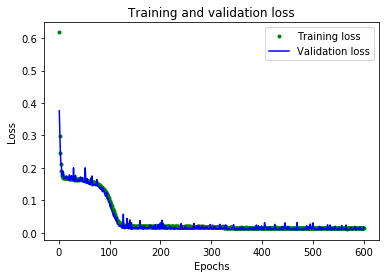

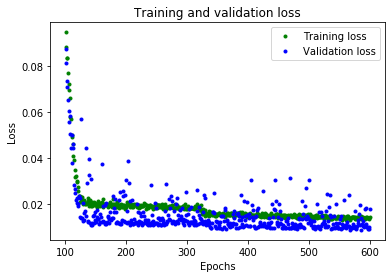

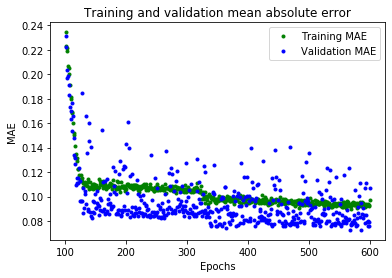

In [46]:
# Draw a graph of the loss, which is the distance between
# the predicted and actual values during training and validation.
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Exclude the first few epochs so the graph is easier to read
SKIP = 100

plt.clf()

plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()

# Draw a graph of mean absolute error, which is another way of
# measuring the amount of error in the prediction.
mae = history_2.history['mae']
val_mae = history_2.history['val_mae']

plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

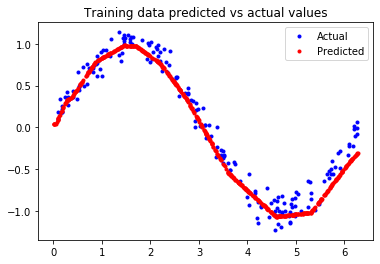

In [47]:
# Use the model to make predictions from our validation data
predictions = model_2.predict(x_train)

# Plot the predictions along with to the test data
plt.clf()
plt.title('Training data predicted vs actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_train, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()

In [50]:
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model_2)
tflite_model = converter.convert()

# Save the model to disk
open("sine_model.tflite", "wb").write(tflite_model)

# Convert the model to the TensorFlow Lite format with quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model_2)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

# Save the model to disk
open("sine_model_quantized.tflite", "wb").write(tflite_model)

INFO:tensorflow:Converted 8 variables to const ops.
INFO:tensorflow:Converted 8 variables to const ops.


2376

ValueError: x and y must have same first dimension, but have shapes (200,) and (600, 1)

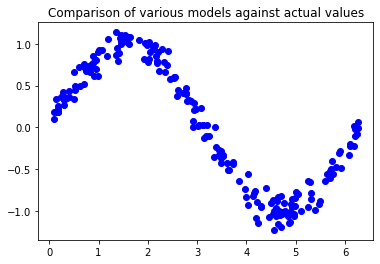

In [49]:
# Instantiate an interpreter for each model
sine_model = tf.lite.Interpreter('sine_model.tflite')
sine_model_quantized = tf.lite.Interpreter('sine_model_quantized.tflite')

# Allocate memory for each model
sine_model.allocate_tensors()
sine_model_quantized.allocate_tensors()

# Get the input and output tensors so we can feed in values and get the results
sine_model_input = sine_model.tensor(sine_model.get_input_details()[0]["index"])
sine_model_output = sine_model.tensor(sine_model.get_output_details()[0]["index"])
sine_model_quantized_input = sine_model_quantized.tensor(sine_model_quantized.get_input_details()[0]["index"])
sine_model_quantized_output = sine_model_quantized.tensor(sine_model_quantized.get_output_details()[0]["index"])

# Create arrays to store the results
sine_model_predictions = np.empty(x_test.size)
sine_model_quantized_predictions = np.empty(x_test.size)

# Run each model's interpreter for each value and store the results in arrays
for i in range(x_test.size):
  sine_model_input().fill(x_test[i])
  sine_model.invoke()
  sine_model_predictions[i] = sine_model_output()[0]

  sine_model_quantized_input().fill(x_test[i])
  sine_model_quantized.invoke()
  sine_model_quantized_predictions[i] = sine_model_quantized_output()[0]

# See how they line up with the data
plt.clf()
plt.title('Comparison of various models against actual values')
plt.plot(x_test, y_test, 'bo', label='Actual')
plt.plot(x_test, predictions, 'ro', label='Original predictions')
plt.plot(x_test, sine_model_predictions, 'bx', label='Lite predictions')
plt.plot(x_test, sine_model_quantized_predictions, 'gx', label='Lite quantized predictions')
plt.legend()
plt.show()


In [51]:
import os
basic_model_size = os.path.getsize("sine_model.tflite")
print("Basic model is %d bytes" % basic_model_size)
quantized_model_size = os.path.getsize("sine_model_quantized.tflite")
print("Quantized model is %d bytes" % quantized_model_size)
difference = basic_model_size - quantized_model_size
print("Difference is %d bytes" % difference)

Basic model is 2408 bytes
Quantized model is 2376 bytes
Difference is 32 bytes


In [52]:
# Install xxd if it is not available
!apt-get -qq install xxd
# Save the file as a C source file
!xxd -i sine_model_quantized.tflite > sine_model_quantized.cc
# Print the source file
!cat sine_model_quantized.cc

/bin/sh: apt-get: command not found
unsigned char sine_model_quantized_tflite[] = {
  0x18, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x00, 0x00, 0x0e, 0x00,
  0x18, 0x00, 0x04, 0x00, 0x08, 0x00, 0x0c, 0x00, 0x10, 0x00, 0x14, 0x00,
  0x0e, 0x00, 0x00, 0x00, 0x03, 0x00, 0x00, 0x00, 0x08, 0x09, 0x00, 0x00,
  0x80, 0x03, 0x00, 0x00, 0x68, 0x03, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00,
  0x0e, 0x00, 0x00, 0x00, 0x58, 0x03, 0x00, 0x00, 0x44, 0x03, 0x00, 0x00,
  0x0c, 0x03, 0x00, 0x00, 0xdc, 0x02, 0x00, 0x00, 0xac, 0x02, 0x00, 0x00,
  0x7c, 0x02, 0x00, 0x00, 0x74, 0x02, 0x00, 0x00, 0x44, 0x02, 0x00, 0x00,
  0x3c, 0x02, 0x00, 0x00, 0x34, 0x02, 0x00, 0x00, 0x24, 0x01, 0x00, 0x00,
  0x1c, 0x01, 0x00, 0x00, 0x0c, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00,
  0x68, 0xf7, 0xff, 0xff, 0xfa, 0xfc, 0xff, 0xff, 0x04, 0x00, 0x00, 0x00,
  0x00, 0x01, 0x00, 0x00, 0x7f, 0xf1, 0x88, 0x3e, 0xdf, 0x4b, 0x9c, 0xbe,
  0x6e, 0x5e, 0xed, 0x3e, 0x84, 0xd4, 0x01, 0x3e, 0x34, 0x56, 0x35, 0x3e,
  0xc1, 0xa1, 0xa0, 0x3e, 0x

In [53]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [54]:
model_2.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 8)                 16        
_________________________________________________________________
dense_31 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_32 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 9         
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________
